In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../SatLib')

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import islTradestudyFunc
from matplotlib.pyplot import ylim
%matplotlib inline

In [3]:
islTradestudyFunc.calcMinMaxParams(alt=6900, numSats=3)

'Minimum distance threshold required: 22987'

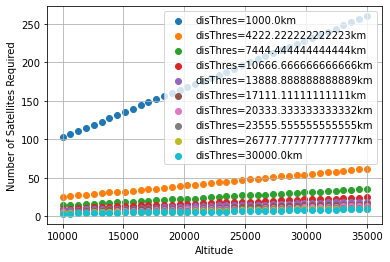

In [4]:
alt = np.linspace(10000, 35000, 40)
disThres = np.linspace(1000, 30000, 10)
islTradestudyFunc.graphNumSats(alt, disThres, varyDisThres=True)

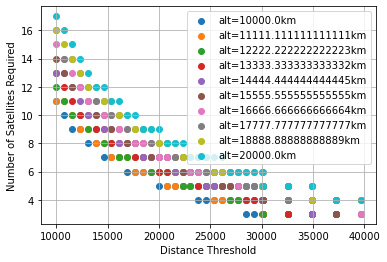

In [6]:
disThres = np.linspace(10000, 40000, 40)
alt = np.linspace(10000, 20000, 10)
islTradestudyFunc.graphNumSats(alt, disThres, varyAlt=True)

In [6]:
import satbox as sb
import astropy.units as u
from astropy.time import Time
import Interval_Finder as IF

In [7]:
input_dict = {'i': 60, 't': 3, 'p': 1, 'f': 0, 'alt': 6900, 'dist_threshold': 23000, 'time': '2022-06-08T00:00:00', 'prop_dur': 1}
i = input_dict['i'] *u.deg
t = input_dict['t']
p = input_dict['p']
f = input_dict['f']
alt = input_dict['alt'] *u.km
dist_threshold = input_dict['dist_threshold']
time = input_dict['time']
prop_dur = input_dict['prop_dur']

In [8]:
epoch = Time(time, format='isot', scale='utc')
walker = sb.Constellation.from_walker(i, t, p, f, alt)
t2propagate = prop_dur*u.day
tStep = 60 * u.s
walkerSim = sb.SimConstellation(walker, t2propagate, tStep, verbose = True)
walkerSim.propagate()

/Users/jacelu/opt/anaconda3/envs/SatelliteExample/lib/python3.9/site-packages/astropy/units/decorators.py:253: UserWarning: Wrapping true anomaly to -π <= nu < π
  return_ = wrapped_function(*func_args, **func_kwargs)


In [9]:
relative_position_data_ISL = IF.get_relative_position_data_ISL(walkerSim,dist_threshold)
satellites = IF.find_feasible_links_ISL(t, relative_position_data_ISL)
L_avail_ISL = IF.get_availability_ISL(satellites, relative_position_data_ISL)
L_poly_ISL = IF.get_polyline_ISL(satellites, relative_position_data_ISL)

No False Intervals Found


In [10]:
walker.generate_czml_file(prop_duration=prop_dur, sample_points=prop_dur*144, fname='islTradestudy', satellites=satellites, L_avail_ISL=L_avail_ISL, L_poly_ISL=L_poly_ISL, show_polyline_ISL=True, create_file=True)

[0.0, 13278136.599999996, 0.0, 0.0, 600.0, 12873265.737683346, 1626955.8088073188, 2817970.122523592, 1200.0, 11683343.424691422, 3154694.8342501856, 5464091.7352963975, 1800.0, 9780934.793838242, 4490050.838435573, 7776996.180737645, 2400.0, 7282054.5911766775, 5551589.693488303, 9615635.41189747, 3000.0, 4339092.238951057, 6274575.485842336, 10867883.537405096, 3600.0, 1131518.6586024151, 6614918.311919926, 11457374.604163058, 4200.0, -2145058.4195767455, 6551863.016441632, 11348159.628708385, 4800.0, -5290823.219163507, 6089254.905811957, 10546898.877104346, 5400.0, -8113937.299957733, 5255305.249474435, 9102455.701373154, 6000.0, -10442238.457767405, 4100870.8696868005, 7102916.701576705, 6600.0, -12133739.706633177, 2696352.7356381393, 4670219.93325259, 7200.0, -13085288.083173415, 1127402.695204721, 1952718.7486846657, 7800.0, -13238855.232453773, -510299.8389160618, -883865.2480968327, 8400.0, -12585076.156052306, -2116882.714903176, -3666548.4158766423, 9000.0, -11163820.318548